In [1]:
!pip install utils

You should consider upgrading via the 'c:\users\magicalgirl\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [253]:
import sys
import matplotlib.pyplot as plt
import utils
#import pai_io
import numpy as np
import skimage.io as skio

def imread(filename, as_gray = False):
    image = skio.imread(filename, as_gray = as_gray)
    if image.dtype == np.float64 :
        image = utils.to_uint8(image)
    return image

def to_uint8(image) :
    if image.dtype == np.float64 :
        image = image * 255
    image[image<0]=0
    image[image>255]=255
    image = image.astype(np.uint8, copy=False)
    return image

if __name__ == '__main__':
    
    argv=sys.argv
    filenameA = argv[1]
    filenameB = argv[2]
    imageA = imread(filenameA)
    imageB = imread(filenameB)
    imageAOriginal=imageA
    print('shape: {}'.format(imageA.shape))
    print('shape: {}'.format(imageB.shape))
    if (len(imageA.shape)>2):
        canalesA=imageA.shape[2]
    else:
        canalesA=1
    
    if (len(imageB.shape)>2):
        canalesB=imageB.shape[2]
    else:
        canalesB=1
    
    dimXA=imageA.shape[0]
    dimYA=imageA.shape[1]
    
    dimXB=imageB.shape[0]
    dimYB=imageB.shape[1]
    
    imageA=np.reshape(imageA, (-1))
    imageB=np.reshape(imageB,(-1))
    tamanoB=imageB.shape[0]
    
    if (imageA.shape[0] >= (tamanoB-13)):
   
        #Usamos el primer byte de A, para guardar la cantidad de canales de B.
        #Este lo guardaremos en los 2 bits menos significativos.
        
        imageA[0]=255-(((imageA[0]) >>2) <<2)
        
        #Ahora usamos los 6 bytes siguientes para guardar las dimensiones de x de la imagen B. Esta tiene tamaño maximo 2^12
        
        imageA[1:7]=((imageA[1:7]) >> 2) << 2
        
        masc1=0b000000000011
        imageA[1]+= (dimXB & masc1)
        
        masc2=0b000000001100
        
        imageA[2]+= (dimXB & masc2)>>2
        
        masc3=0b000000110000
        imageA[3]+= (dimXB & masc3)>>4
        
        masc4=0b000011000000
        imageA[4]+= (dimXB & masc4)>>6
        
        masc5=0b001100000000
        imageA[5]+= (dimXB & masc5)>>8
        
        masc6=0b110000000000
        imageA[6]+= (dimXB & masc6)>>10        
        # Usamos el byte 7 al 12 para guardar las dimensiones de y de la imagen B
        
        imageA[7:13]=((imageA[7:13])>>2) <<2
        
        imageA[7]+= (dimYB & masc1)
        imageA[8]+= (dimYB & masc2)>>2
        imageA[9]+= (dimYB & masc3)>>4
        imageA[10]+= (dimYB & masc4)>>6
        imageA[11]+= (dimYB & masc5)>>8
        imageA[12]+= (dimYB & masc6)>>10
        
        # Guardamos el resto de la imagen con cada valor en 4 bytes.
        aux1=0b00000011
        aux2=0b00001100
        aux3=0b00110000
        aux4=0b11000000
        
        i=13
        j=0
        while j < (tamanoB):
            imageA[i:i+4]=(imageA[i:i+4] >> 2) << 2
            imageA[i]+= (imageB[j] & aux1)
            imageA[i+1]+=((imageB[j] & aux2)>>2)
            imageA[i+2]+= ((imageB[j] & aux3)>>4)
            imageA[i+3]+= ((imageB[j] & aux4)>>6)
            j=j+1
            i=i+4
            
        
        imageA=np.reshape(imageA, (dimXA,dimYA, canalesA))
        imageB=np.reshape(imageB, (dimXB, dimYB, canalesB))
        print(imageA.shape)
        
        imageC=get_image_from_lsb(imageA,2)
        
        n_rows = 2
        n_cols = 2
        fig, ax = plt.subplots(n_rows, n_cols)
        
        
        ax[0][0].imshow(imageAOriginal)
        ax[0][0].set_title('Image A original')
        ax[0][1].imshow(imageB)
        ax[0][1].set_title('Image B')
        ax[1][0].imshow(imageA)
        ax[1][0].set_title('Image A modificada')
        ax[1][1].imshow(imageC)
        ax[1][1].set_title('Image B hidden in A')
        plt.show()
        print("La imagen se oculta correctamente")
        
    else: 
        print("No se puede guardar la imagen B dentro de la imagen A")
        

FileNotFoundError: No such file: 'C:\Users\MagicalGirl\Documents\Imagenes\-f'

shape: (1367, 1000, 3)
254
3055
575
No hay imagen oculta


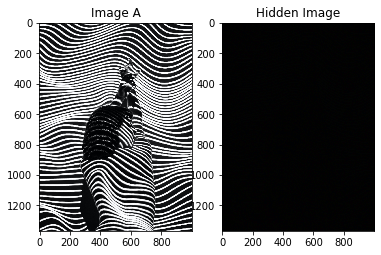

In [248]:
import sys
import matplotlib.pyplot as plt
import utils
#import pai_io
import numpy as np
import skimage.io as skio

def imread(filename, as_gray = False):
    image = skio.imread(filename, as_gray = as_gray)
    if image.dtype == np.float64 :
        image = utils.to_uint8(image)
    return image

    

def get_image_from_lsb(original_image,l):
    
    imageA=original_image
    
    original_image=np.reshape(original_image,(-1))
    
    """
    lsb = least significant bits
    """
    canalesB=((original_image[0] << l)>>l)
    
    print(canalesB)
    
    new_image=(original_image[1:7] <<6)>>6
    
    #print(new_image)
    
    masc1=0b000000000011
    
    dimXB=((masc1 & new_image[0])) + ((masc1 & new_image[1])<<2) + ((masc1 & new_image[2])<<4)
    dimXB+= ((masc1 & new_image[3])<<6) +((masc1 & new_image[4])<<8) +((masc1 & new_image[5])<<10)
    print(dimXB)
    
    new_image=(original_image[7:13])
    dimYB= (masc1 & new_image[0]) + ((masc1 & new_image[1])<<2) + ((masc1 & new_image[2])<<4) + ((masc1 & new_image[3])<<6)
    dimYB+= ((masc1 & new_image[4])<<8) + ((masc1 & new_image[5])<<10)
    print(dimYB)
    
    aux1=0b00000011
    
    i=13
    j=0
    new_image=np.zeros(dimXB* dimYB*canalesB)
    
    if(dimXB*dimYB*canalesB >= original_image.shape[0]):
        print("No hay imagen oculta")
        return imageA -((imageA >>l)<<l)
    else:
        while j < (dimXB*dimYB*canalesB):
            image=(original_image[i:i+4]<<6)>>6
            new_image[j]= (image[0] & aux1)
            new_image[j]+=(image[1] & aux1)<<2
            new_image[j]+= (image[2] & aux1)<<4
            new_image[j]+= (image[3] & aux1)<<6
            j=j+1
            i=i+4
        new_image=np.reshape(new_image,(dimXB,dimYB, canalesB))
        new_image=np.uint8(new_image)
        print(new_image.shape)
        return new_image



if __name__ == '__main__':
    filenameA = 'img1.jpg'
    filenameB="img2.jpg"
    imageA = imread(filenameA)
    imageC=imread(filenameB)
    print('shape: {}'.format(imageA.shape))
    
    #print(imageC[1:7])
    
    imageB=get_image_from_lsb(imageA,2)
  
    n_rows = 1
    n_cols = 2
    fig, ax = plt.subplots(n_rows, n_cols)
    ax[0].imshow(imageA)
    ax[0].set_title('Image A')
    ax[1].imshow(imageB)
    ax[1].set_title('Hidden Image')
       
    plt.show()
    
